# SVM Assignment

### Dreamy Pujara (202211005)

In [17]:
#libraaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics
import scipy.io

1. Write a function implementing the standard SVM with linear kernel using the
gradient descent method. Obtain the best accuracy on the test set by tuning the
value of the parameter λ . Plot the decision boundary obtained by the standard
SVM mode with linear kernel. Compare it with the Bayesian decision boundary.

In [3]:
u1 = np.array([-1 , 1])
u2 = np.array([2 , 1])
cov_mat = [[0.7, 0.25],[0.25, 0.3]]

A1,A2 = np.random.multivariate_normal(u1,cov_mat,2000).T
B1,B2 = np.random.multivariate_normal(u2,cov_mat,2000).T

df1 = pd.DataFrame([A1,A2, -np.ones(len(A1))])
df1 = df1.T
df1.columns=['x1','x2','y']

df2 = pd.DataFrame([B1,B2, -np.ones(len(A1))])
df2 = df2.T
df2.columns=['x1','x2','y']

df = pd.concat([df1,df2])

train_x,test_x,train_y,test_y = train_test_split(df[['x1','x2']],df['y'],test_size=0.125,random_state=42)
a_x,ax_test,a_y,ay_t=train_test_split(A1,A2,test_size=0.125,random_state=42)
b_x,bx_t,b_y,by_t=train_test_split(B1,B2,test_size=0.125,random_state=42)




In [4]:
train_x = np.array(train_x)
train_y = np.array(train_y)

alpha = 0.01
lmda = 2**-8

theta = np.array([0,0])
b = 0

for k in range(500):
  temp1,temp2 = 0,0

for i in range(len(train_x)):
  if(np.dot(theta,train_x[i])+b) * train_y[i] <=1 :
    temp1 += -train_y[i] * train_x[i]
    temp2 += -train_y[i]

grad = lmda * theta + temp1
theta = theta - alpha * grad
b -= alpha * temp2



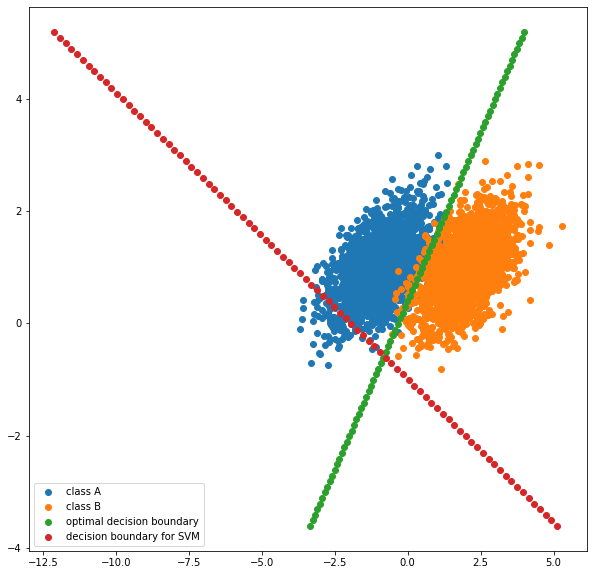

In [7]:
#ploting optimal decision boundry

w=np.dot(np.linalg.inv(cov_mat), u1-u2)
c= np.dot (w , (1/2)*(u1 +u2))

x2 = np.arange(np.append(a_x,b_x).min(),np.append(a_x,b_x).max(),0.1)
x1=(c-w[1]*x2)/w[0]

#SVM Boundary

x2_svm = np.arange(np.append(a_x,b_x).min(),np.append(a_x,b_x).max(), 0.1)
x1_svm = (-x2_svm * theta[1] - b)/theta[0]

plt.figure(figsize = (10,10))
plt.scatter(A1,A2,label = "class A")
plt.scatter(B1,B2,label = "class B")
plt.scatter(x1,x2, label = 'optimal decision boundary')
plt.scatter(x1_svm,x2_svm, label = 'decision boundary for SVM')
plt.legend()
plt.show()


In [10]:
# accuracy on test set
y_hat = np.dot(np.array(test_x), theta) + b
for i, y in enumerate(y_hat):
  if y > 0:
    y_hat[i] = 1
  else:
    y_hat[i] = -1
print(f' Accuracy on test set is -> {sklearn.metrics.accuracy_score(test_y,y_hat)}')


 Accuracy on test set is -> 0.978


2. Consider the two moon dataset. Divide the training and testing point in the ratio of
4:1. Train the standard SVM model with RBF kernel and plot the optimal separating
surface obtained by the SVM model by tuning the parameter λ and kernel parameter
σ. Report Precision, Recall, F-measure and accuracy on testing set.

In [12]:
data = scipy.io.loadmat('/content/2moons.mat')


In [13]:
# manual svm
alpha = 0.001
lmda = 2**-8
sigma = 2**-8
def kernel(x1,x2, sigma):
  return np.exp(((-1) / (2 * sigma)) * np.linalg.norm(x1-x2)**2)
train_x = data['x']
train_y = data['y']
train_x = np.array(train_x)
# kernel matrix
h_mat = []
for i in range(len(train_x)):
  temp = []
  for j in range(len(train_x)):
    temp.append(kernel(train_x[i], train_x[j], sigma))
  h_mat.append(temp)
h_mat = np.array(h_mat).T
theta = np.array([0 for _ in range(len(train_x))])
temp1, temp2 = 0,0
b = 0
for _ in range(700):
  for i in range(len(train_x)):
    if (np.dot(theta, h_mat[i]) + b) * train_y[i] <= 1:
      temp1 += -train_y[i] * h_mat[i]
      temp2 += -train_y[i]
  grad = lmda * theta + temp1
  theta = theta - alpha * grad
  b -= alpha * temp2
theta = np.append(theta, b)

In [14]:
test_x = data['xt']
test_y = data['yt']
test_x = np.array(test_x)
h_mat_t = []
for i in range(len(data['xt'])):
  temp = []
  for j in range(len(data['x'])):
    temp.append(kernel(train_x[j], test_x[i], sigma))
  h_mat_t.append(temp)
h_mat_t = np.array(h_mat_t)
h_mat_t = np.column_stack((h_mat_t, np.ones(len(data['xt']))))
h_mat_t = h_mat_t.T
y_hat = np.dot(h_mat_t.T,theta)
for i, y in enumerate(y_hat):
  if y > 0:
    y_hat[i] = 1
  else:
    y_hat[i] = -1
p = data['yt']
print(f'Accuracy on test set is -> {sklearn.metrics.accuracy_score(p, y_hat)}')
print(f'Recall on test set is -> {sklearn.metrics.recall_score(p, y_hat)}')
print(f'Precision on test set is -> {sklearn.metrics.precision_score(p,y_hat)}')


Accuracy on test set is -> 0.91
Recall on test set is -> 1.0
Precision on test set is -> 0.856


3. Consider the Iris dataset. The dataset contains three types of flower described by the
four features. Consider only the data points with label 1 and 2. Divide the dataset
into training, testing and validation in the ration 8:1:1. Use the training set to train
the SVM model with linear kernel. Use the validation set to tune the parameter
value λ. Finally obtain the accuracy on the test set.

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
train_x = []
train_y = []

for i in range(len(data['data'])):
  if data['target'][i] == 1:
    train_y = np.append(train_y, np.array([-1]))
    train_x.append(data['data'][i])
  elif data['target'][i] == 2:
    train_y = np.append(train_y, np.array([1]))
    train_x.append(data['data'][i])
train_x = np.array(train_x)
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y,random_state=104, test_size = 0.2, shuffle = True)
test_x, val_x, test_y, val_y = train_test_split(test_x, test_y,random_state=104, test_size = 0.5, shuffle = True)

In [19]:
alpha = 0.05
lmda = 2**-8
theta = np.array([0,0,0,0])
b = 0
for k in range(500):
  temp1, temp2 = 0,0
  for i in range(len(train_x)):
    if (np.dot(theta, train_x[i]) + b) * train_y[i] <= 1:
      temp1 += -train_y[i] * train_x[i]
      temp2 += -train_y[i]
  grad = lmda * theta + temp1
  theta = theta - alpha * grad
  b -= alpha * temp2
theta = np.append(theta, np.array([b]))

In [21]:
val_x_app = np.column_stack((val_x, np.ones(len(val_x))))
y_hat = np.dot(val_x_app,theta)
for i, y in enumerate(y_hat):
  if y > 0:
    y_hat[i] = 1
  else:
    y_hat[i] = -1
print(f'Accuracy on validation set is -> {sklearn.metrics.accuracy_score(val_y,y_hat)}')

Accuracy on validation set is -> 0.9


In [23]:
print(f'Recall on validation set is -> {sklearn.metrics.recall_score(val_y,y_hat)}')
print(f'Precision on validation set is -> {sklearn.metrics.precision_score(val_y, y_hat)}')

Recall on validation set is -> 1.0
Precision on validation set is -> 0.8571428571428571


In [24]:
test_x_app = np.column_stack((test_x, np.ones(len(test_x))))
y_hat = np.dot(test_x_app,theta)
for i, y in enumerate(y_hat):
  if y > 0:
    y_hat[i] = 1
  else:
    y_hat[i] = -1
print(f'Accuracy on test set is -> {sklearn.metrics.accuracy_score(test_y,y_hat)}')
print(f'Recall on test set is -> {sklearn.metrics.recall_score(test_y, y_hat)}')
print(f'Precision on test set is -> {sklearn.metrics.precision_score(test_y,y_hat)}')


Accuracy on test set is -> 1.0
Recall on test set is -> 1.0
Precision on test set is -> 1.0
